In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lets download the wine-quaity data from UCI repository

In [2]:
import urllib.request

print('Downloading wine quality data')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urllib.request.urlretrieve(url, 'winequality-white.csv')

('winequality-white.csv', <http.client.HTTPMessage at 0x7f9ea9eeb2b0>)

## Read the data in numpy format (.npy)

In [3]:
df = pd.read_csv('winequality-white.csv',delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Split the data to training and test

In [4]:
y = df["quality"].to_numpy()
X = df.drop("quality",axis = 1).to_numpy()
n = len(y)

I = np.random.permutation(n)
X = X[I]
y = y[I]

X_train = X[0:np.int(4/5*n)]
y_train = y[0:np.int(4/5*n)]

X_test = X[np.int(4/5*n):]
y_test = y[np.int(4/5*n):]

## Linear Regression!

Train loss =  55.8
Test loss =  58.4


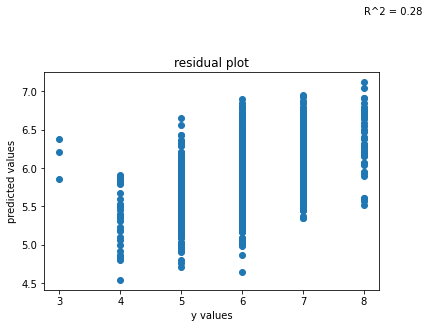

In [5]:
from sklearn.linear_model import LinearRegression

# Fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Testting
train_loss = np.mean((model.predict(X_train) - y_train)**2)
test_loss = np.mean((model.predict(X_test) - y_test)**2)
print("Train loss = ", round(100*train_loss,1))
print("Test loss = ", round(100*test_loss,1))

plt.scatter(y_test,model.predict(X_test))
plt.xlabel("y values")
plt.ylabel("predicted values")
plt.title("residual plot")
R2 = 1 -  test_loss/np.var(y_test)
plt.text(8,8,"R^2 = " + str(np.round(R2,2)))
plt.show()


In [6]:
import torch as th
from dc_regression_gpu import dc_regression

if th.cuda.is_available():
    device = th.device("cuda")          # a CUDA device object
else:
    device = th.device("cpu")

X_train = th.from_numpy(X_train.astype('float32')).to(device)
y_train = th.from_numpy(y_train.astype('float32')).to(device)  
X_test = th.from_numpy(X_test.astype('float32')).to(device)
y_test = th.from_numpy(y_test.astype('float32')).to(device)   

# Fitting
model = dc_regression()
th.cuda.empty_cache()  
model.fit(X_train,y_train)

# Testting
train_loss = np.mean((model.predict(X_train) - y_train)**2)
test_loss = np.mean((model.predict(X_test) - y_test)**2)
print("Train loss = ", round(100*train_loss,1))
print("Test loss = ", round(100*test_loss,1))

plt.scatter(y_test,model.predict(X_test))
plt.xlabel("y values")
plt.ylabel("predicted values")
plt.title("residual plot")
R2 = 1 -  test_loss/np.var(y_test)
plt.text(8,8,"R^2 = " + str(np.round(R2,2)))
plt.show()

KeyboardInterrupt: 